In [2]:
#this is implementation of paper with title 
#Image Quality Assessment for Image Filtering Algorithm: Qualitative and Quantitative Analyses
#this test only use 2 images

#name: Yusuf Gladiensyah Bihanda
#NRP: 6025222011

In [83]:
#import library
import cv2 as cv
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

(256, 256, 3)
(510, 510, 3)


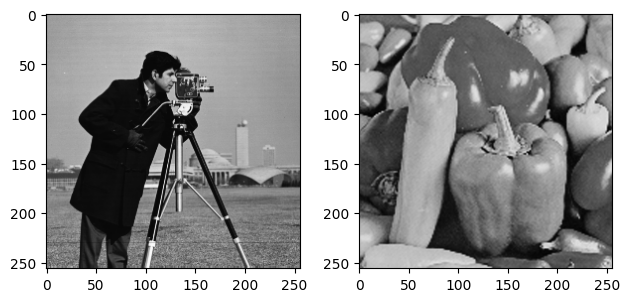

In [50]:
#load sample image 1 
sample_img_1 = cv.imread('sample_1.png')
print(sample_img_1.shape)

#load sample image 2
sample_img_2 = cv.imread('sample_2.png')
print(sample_img_2.shape)
sample_img_2 = cv.resize(sample_img_2, (256,256))

#show image
plt.rcParams["figure.autolayout"] = True
plt.subplot(1,2,1)
plt.imshow(sample_img_1)
plt.subplot(1,2,2)
plt.imshow(sample_img_2)

In [56]:
#add noise function
def add_salt_pepper(img, density=0.01):
    random_noise = np.random.rand(img.shape[0], img.shape[1])
    output = img.copy()
    output[random_noise < density] = 0
    output[random_noise > 1 - density] = 255
    return output

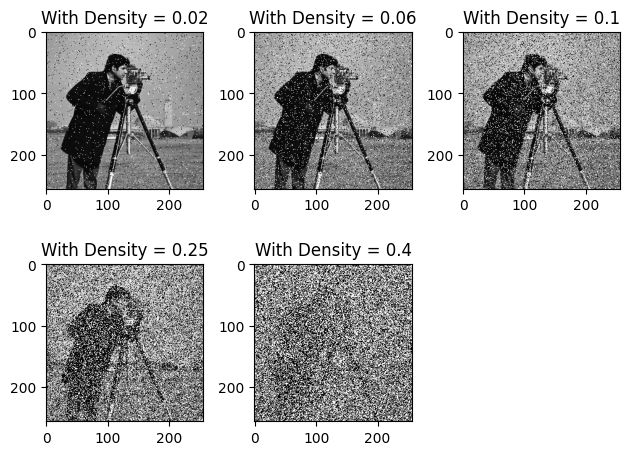

In [91]:
#add noise to first image (from density 0.02, 0.06, 0.1, 0.25, 0.4)
cameraman_img_1 = add_salt_pepper(sample_img_1, 0.02)
cameraman_img_2 = add_salt_pepper(sample_img_1, 0.06)
cameraman_img_3 = add_salt_pepper(sample_img_1, 0.1)
cameraman_img_4 = add_salt_pepper(sample_img_1, 0.25)
cameraman_img_5 = add_salt_pepper(sample_img_1, 0.4)

#show first image with noise
plt.rcParams["figure.autolayout"] = True
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(cameraman_img_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(cameraman_img_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(cameraman_img_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(cameraman_img_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(cameraman_img_5)

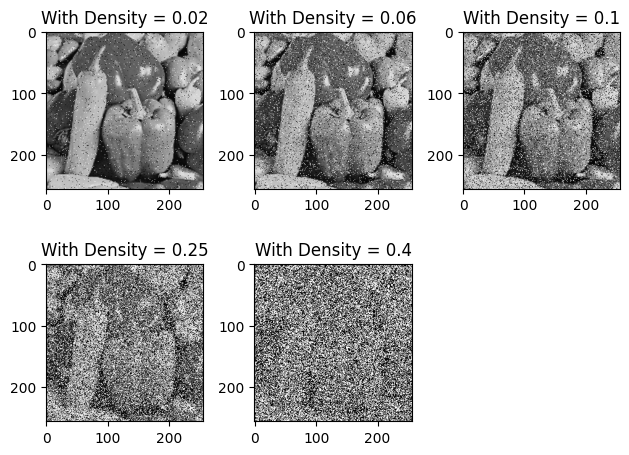

In [65]:
#add noise to second image (from density 0.02, 0.06, 0.1, 0.25, 0.4)
fruit_img_1 = add_salt_pepper(sample_img_2, 0.02)
fruit_img_2 = add_salt_pepper(sample_img_2, 0.06)
fruit_img_3 = add_salt_pepper(sample_img_2, 0.1)
fruit_img_4 = add_salt_pepper(sample_img_2, 0.25)
fruit_img_5 = add_salt_pepper(sample_img_2, 0.4)

#show second image with noise
plt.rcParams["figure.autolayout"] = True
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(fruit_img_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(fruit_img_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(fruit_img_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(fruit_img_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(fruit_img_5)

In [86]:
#for removing noise with 3 filter (gaussian, median, and wiener) we try to use first image
#define function for gaussian, median, and wiener

def gaussian_filter(img, kernel=3,sigma=85):
    new_gauss_img = cv.GaussianBlur(img, (kernel, kernel), sigma)
    return new_gauss_img

def median_filter(img, kernel=3):
    new_median_img = cv.medianBlur(img, kernel)
    return new_median_img

#add gaussian kernel for wiener filter
def gaussian_kernel(kernel=3):
    h = gaussian(kernel, kernel/3).reshape(kernel, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def wiener_filter(img, kernel, K=10):
    kernel /= np.sum(kernel)
    new_wiener_img = img.copy()
    new_wiener_img = fft2(new_wiener_img)
    kernel = fft2(kernel, s=img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    new_wiener_img = new_wiener_img * kernel
    new_wiener_img = np.abs(ifft2(new_wiener_img))
    return new_wiener_img

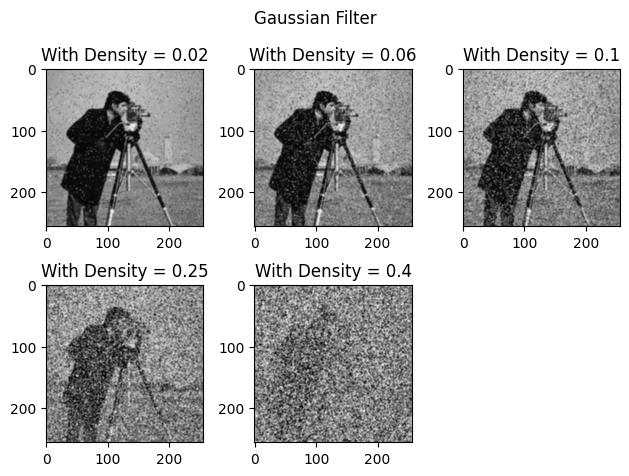

In [71]:
#lets look the result for gaussian
gauss_res_1 = gaussian_filter(cameraman_img_1)
gauss_res_2 = gaussian_filter(cameraman_img_2)
gauss_res_3 = gaussian_filter(cameraman_img_3)
gauss_res_4 = gaussian_filter(cameraman_img_4)
gauss_res_5 = gaussian_filter(cameraman_img_5)

#show image with gaussian filter
plt.rcParams["figure.autolayout"] = True
plt.suptitle("Gaussian Filter")
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(gauss_res_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(gauss_res_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(gauss_res_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(gauss_res_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(gauss_res_5)

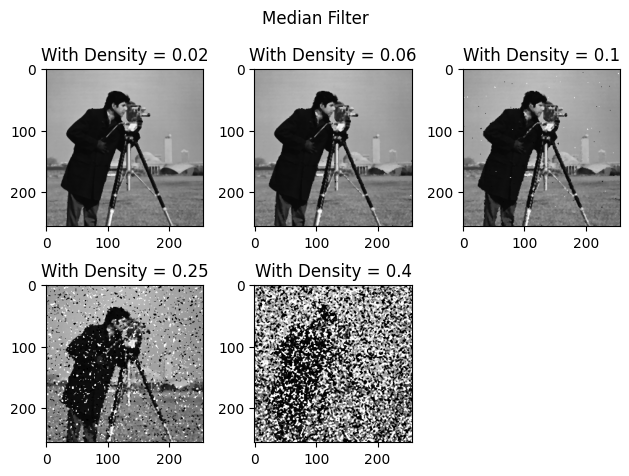

In [73]:
#lets look the result for median
median_res_1 = median_filter(cameraman_img_1)
median_res_2 = median_filter(cameraman_img_2)
median_res_3 = median_filter(cameraman_img_3)
median_res_4 = median_filter(cameraman_img_4)
median_res_5 = median_filter(cameraman_img_5)

#show image with median filter
plt.rcParams["figure.autolayout"] = True
plt.suptitle("Median Filter")
plt.subplot(2,3,1)
plt.title("With Density = 0.02")
plt.imshow(median_res_1)
plt.subplot(2,3,2)
plt.title("With Density = 0.06")
plt.imshow(median_res_2)
plt.subplot(2,3,3)
plt.title("With Density = 0.1")
plt.imshow(median_res_3)
plt.subplot(2,3,4)
plt.title("With Density = 0.25")
plt.imshow(median_res_4)
plt.subplot(2,3,5)
plt.title("With Density = 0.4")
plt.imshow(median_res_5)

In [ ]:
#lets try using wiener filter
wiener_res_1 = wiener_filter(cameraman_img_1, gaussian_kernel(3))
plt.imshow(wiener_res_1)

In [120]:
#define peak signal to noise ratio (psnr) and mean square error (mse) metrics
def mse(noisy_img, filtered_img):
    diff = (noisy_img - filtered_img) ** 2
    sum_diff = np.sum(diff)
    num_pixel = float(noisy_img.shape[0] * noisy_img.shape[1])
    error_res = sum_diff / num_pixel
    return error_res

def psnr(noisy_img, filtered_img):
    mse_result = mse(noisy_img, filtered_img)
    if mse_result == 0:
        return 100
    return 20 * np.log10(255./np.sqrt(mse_result))

In [121]:
#show value of psnr and mse
psnr_img_1 = psnr(gauss_res_5, cameraman_img_5)
mse_img_1 = mse(gauss_res_5, cameraman_img_5)
print(mse_img_1)
print(psnr_img_1)

325.9054412841797
22.99988749405631
